In [1]:
import pandas as pd
import numpy as np
from sargas import *
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
rc = 3.0
n = 256
rho = 0.2

potential = Potential.lennard_jones(1.0, 1.0, rc, tail_correction=True, with_shift=True)
configuration = Configuration.lattice(n, rho, initial_temperature=1.0)
system = System(configuration, potential)
velocity_verlet = Integrator.velocity_verlet(0.001)
md = MolecularDynamics(velocity_verlet)
simulation = Simulation.molecular_dynamics(system, md, n)
props = Observer.properties(10)
simulation.add_observer(props)

In [8]:
simulation.run(10000)

In [9]:
results = pd.DataFrame(props.data)
results.head()

,pressure,virial,potential_energy,density,volume,nparticles
0,-0.223402,0.0,-285.954745,0.2,1280.0,256.0
1,-0.223402,0.0,-285.954745,0.2,1280.0,256.0
2,-0.223402,0.0,-285.954745,0.2,1280.0,256.0
3,-0.223402,0.0,-285.954745,0.2,1280.0,256.0
4,-0.223402,0.0,-285.954745,0.2,1280.0,256.0


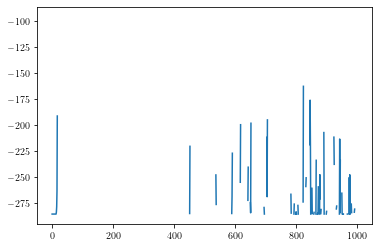

In [10]:
plt.plot(results.index, results.potential_energy)